In [7]:
from IPython.display import Image
Image(url='https://www.skyvpn.net/blog/wp-content/uploads/2020/03/How-a-VPN-Can-Stop-Spam-Emails.png',width=500)

In [8]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as pyplot
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report

In [10]:
ds=pd.read_csv("/content/spam.csv",encoding='latin')

In [4]:
ds

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [11]:
ds.sample(10)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
1894,spam,"FreeMsg Hey U, i just got 1 of these video/pic...",NaN,NaN,NaN
3799,spam,We tried to contact you re your reply to our o...,NaN,NaN,NaN
456,ham,"LOOK AT AMY URE A BEAUTIFUL, INTELLIGENT WOMAN...",NaN,NaN,NaN
1143,ham,And is there a way you can send shade's stuff ...,NaN,NaN,NaN
3119,ham,Good evening! this is roger. How are you?,NaN,NaN,NaN
2208,spam,URGENT!! Your 4* Costa Del Sol Holiday or å£50...,NaN,NaN,NaN
2844,ham,Will be out of class in a few hours. Sorry,NaN,NaN,NaN
3268,ham,Raviyog Peripherals bhayandar east,NaN,NaN,NaN
1070,ham,"alright, I'll make sure the car is back tonight",NaN,NaN,NaN
2089,ham,No i'm not. I can't give you everything you wa...,NaN,NaN,NaN


In [12]:
ds.shape

(5572, 5)

In [13]:
print("rows--->",ds.shape[0])
print("columns--->",ds.shape[1])

rows---> 5572
columns---> 5


In [14]:
ds.isnull()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,False,False,True,True,True
1,False,False,True,True,True
2,False,False,True,True,True
3,False,False,True,True,True
4,False,False,True,True,True
...,...,...,...,...,...
5567,False,False,True,True,True
5568,False,False,True,True,True
5569,False,False,True,True,True
5570,False,False,True,True,True


In [15]:
ds.isnull().sum()

v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

In [16]:
ds.columns

Index(['v1', 'v2', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], dtype='object')

In [17]:
ds.isna().mean()

v1            0.000000
v2            0.000000
Unnamed: 2    0.991027
Unnamed: 3    0.997846
Unnamed: 4    0.998923
dtype: float64

In [18]:
ds.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],axis=0,inplace=True)

In [19]:
ds

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [20]:
ds.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [21]:
ds.tail()

,v1,v2
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...
5571,ham,Rofl. Its true to its name


In [22]:
ds.size

11144

In [23]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   v1      5572 non-null   object
 1   v2      5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [24]:
ds.describe()

,v1,v2
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [25]:
ds=ds.rename(columns={'v1':'target','v2':'message'})

In [26]:
ds.isnull().sum()

target     0
message    0
dtype: int64

In [27]:
ds.duplicated().sum()

403

In [28]:
ds.drop_duplicates(keep='first',inplace=True)

In [29]:
ds.duplicated().sum()

0

In [30]:
ds.size

10338

In [32]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
ds['target']=encoder.fit_transform(ds['target'])
ds['target']

0       0
1       0
2       1
3       0
4       0
       ..
5567    1
5568    0
5569    0
5570    0
5571    0
Name: target, Length: 5169, dtype: int64

In [33]:
ds.head()

,target,message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


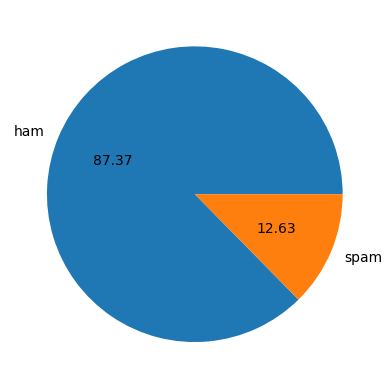

In [35]:
pyplot.pie(ds['target'].value_counts(),labels=['ham','spam'],autopct="%0.2f")
pyplot.show()

In [36]:
x=ds['message']
y=ds['target']

In [37]:
print(x)

0       Go until jurong point, crazy.. Available only ...
1                           Ok lar... Joking wif u oni...
2       Free entry in 2 a wkly comp to win FA Cup fina...
3       U dun say so early hor... U c already then say...
4       Nah I don't think he goes to usf, he lives aro...
                              ...                        
5567    This is the 2nd time we have tried 2 contact u...
5568                Will Ì_ b going to esplanade fr home?
5569    Pity, * was in mood for that. So...any other s...
5570    The guy did some bitching but I acted like i'd...
5571                           Rofl. Its true to its name
Name: message, Length: 5169, dtype: object


In [38]:
y

0       0
1       0
2       1
3       0
4       0
       ..
5567    1
5568    0
5569    0
5570    0
5571    0
Name: target, Length: 5169, dtype: int64

In [39]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=3)

In [40]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn import svm

In [41]:
cv=CountVectorizer()

In [42]:
x_train_cv=cv.fit_transform(x_train)
x_test_cv=cv.transform(x_test)

In [48]:
print(x_train_cv)

  (0, 1879)	1
  (0, 1170)	1
  (0, 6840)	1
  (0, 6610)	1
  (0, 2779)	1
  (1, 1939)	1
  (1, 4467)	1
  (1, 453)	1
  (1, 7176)	1
  (1, 7594)	1
  (1, 1577)	1
  (1, 203)	1
  (1, 4768)	1
  (1, 7175)	1
  (1, 7390)	1
  (1, 7590)	1
  (1, 4309)	1
  (1, 5157)	1
  (1, 3732)	1
  (1, 3015)	1
  (1, 2333)	1
  (1, 5210)	1
  (1, 4577)	1
  (1, 4731)	1
  (1, 5615)	1
  :	:
  (4134, 3290)	2
  (4134, 4817)	1
  (4134, 1546)	1
  (4134, 4195)	1
  (4134, 891)	1
  (4134, 1092)	1
  (4134, 1261)	1
  (4134, 7302)	1
  (4134, 6595)	1
  (4134, 1624)	1
  (4134, 1977)	1
  (4134, 7438)	1
  (4134, 6189)	1
  (4134, 6815)	1
  (4134, 2357)	1
  (4134, 4093)	1
  (4134, 6583)	1
  (4134, 5934)	1
  (4134, 1661)	1
  (4134, 5153)	1
  (4134, 6292)	1
  (4134, 3707)	1
  (4134, 6172)	1
  (4134, 3624)	1
  (4134, 4785)	1


In [43]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()

In [44]:
lr.fit(x_train_cv,y_train)
prediction_train=lr.predict(x_train_cv)

In [45]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_train,prediction_train)*100)

99.75816203143893


In [46]:
prediction_test=lr.predict(x_test_cv)

In [47]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,prediction_test)*100)

97.58220502901354
